In [295]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [296]:
# read words 
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'daisuke']

In [297]:
# build the vocab of chars and mapping to/from int
chars = sorted(list(set(''.join(words))))
stoi = {ch: i + 1 for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i: ch for ch, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset

block_size = 3 
X_input, Y_label = [], []
for word in words:

    print(word)
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X_input.append(context)
        Y_label.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        # 以下debug用
        # print(context, '---->', ix)
        # print(context[1:], '---->', [ix])
        context = context[1:] + [ix] # crop and append
        # print(context)

X_input = torch.tensor(X_input, dtype=torch.int64)
Y_label = torch.tensor(Y_label, dtype=torch.int64)

In [298]:
def build_dataset(words):

    block_size = 3 
    X_input, Y_label = [], []
    for word in words:
        context = [0] * block_size
        for ch in word + '.':
            ix = stoi[ch]
            X_input.append(context)
            Y_label.append(ix)
            # print(''.join(itos[i] for i in context), '---->', itos[ix])
            # 以下debug用
            # print(context, '---->', ix)
            # print(context[1:], '---->', [ix])
            context = context[1:] + [ix] # crop and append

    X_input = torch.tensor(X_input, dtype=torch.int64)
    Y_label = torch.tensor(Y_label, dtype=torch.int64)
    print(X_input.shape, Y_label.shape)
    return X_input, Y_label

import random
random.seed(42)
random.shuffle(words)
n1 = int(len(words) * 0.8)
n2 = int(len(words) * 0.9)

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182453, 3]) torch.Size([182453])
torch.Size([22846, 3]) torch.Size([22846])
torch.Size([22855, 3]) torch.Size([22855])


In [ ]:
C = torch.randn((27,2))

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # これは、C[5]と同じ

In [ ]:
embedded = C[X_input]

In [ ]:
embedded

In [ ]:
torch.cat([embedded[:, 0, :], embedded[:, 1, :], embedded[:, 2, :]], dim=1).shape

In [ ]:
torch.cat(torch.unbind(embedded, 1), 1).shape

In [ ]:
a = torch.arange(18)
a

In [ ]:
# torch.view()は、元のデータを共有するので計算が高速
a.view(3, 2, 3)

In [ ]:
embedded.view(-1, 6) == torch.cat(torch.unbind(embedded, 1), 1)

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn((100,))

In [ ]:
h = embedded.view(embedded.shape[0], 6) @ W1 + b1

In [ ]:
h = embedded.view(-1, 6) @ W1 + b1

In [ ]:
h.shape

In [ ]:
h = torch.tanh(h)

In [ ]:
h.shape

In [ ]:
h

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn((27,))

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

In [ ]:
counts = logits.exp()

In [ ]:
probs = counts / counts.sum(1, keepdim=True)

In [ ]:
probs.shape

In [ ]:
probs[0].sum()

In [ ]:
probs[torch.arange(32), Y_label]

In [ ]:
loss = - probs[torch.arange(32), Y_label].log().mean()

In [299]:
## 以下、モデル化   
Xtr.shape, Ytr.shape

(torch.Size([182453, 3]), torch.Size([182453]))

In [350]:
g = torch.Generator().manual_seed(214483647)
C = torch.randn((27, 12), generator=g)
W1 = torch.randn((36, 250), generator=g)
b1 = torch.randn((250,), generator=g)
W2 = torch.randn((250, 27), generator=g)
b2 = torch.randn((27,), generator=g)
parameters = [C, W1, b1, W2, b2]

In [351]:
sum(p.nelement() for p in parameters) # the number of parameters

16351

In [352]:
for p in parameters:
    p.requires_grad = True

In [359]:
lrp = torch.linspace(-3, 0, 1000)
lre = 10**lrp
lre

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [356]:
lri = []
lossi = []
stepi = []

In [370]:
for i in range(200000):

    # minibatch construction
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 36) @ W1 + b1)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = - prob[torch.arange(32), Y_label].log().mean() -> これは、以下のように書き換えられる。forward pass, backward pass, fewer kernel calls, and less memory usage
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss)
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update 
    # lr = lre[i] # 下の方法でlrの幅の予測ができる
    lr = 0.005 #　最後のほうに使う learning rate, 最後のほうはdecayする
    # lr = 0.1 if i < 30000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # tracking
    # lri.append(lrp[i])
    lossi.append(loss.log10().item())
    stepi.append(i)

print(loss.item())

1.9119833707809448


In [ ]:
plt.plot(lri, lossi)

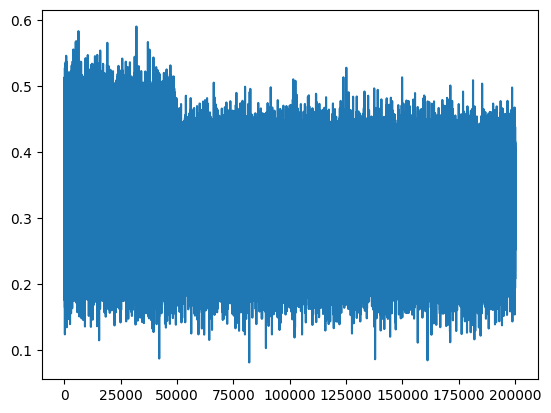

In [371]:
plt.plot(stepi, lossi)

In [372]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 36) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0832, grad_fn=<NllLossBackward0>)

In [373]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 36) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1629, grad_fn=<NllLossBackward0>)

In [377]:
# 以下、テストデータでの評価、ほとんどの場合、テストデータでの評価は行わない
emb = C[Xte]
h = torch.tanh(emb.view(-1, 36) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.1447, grad_fn=<NllLossBackward0>)

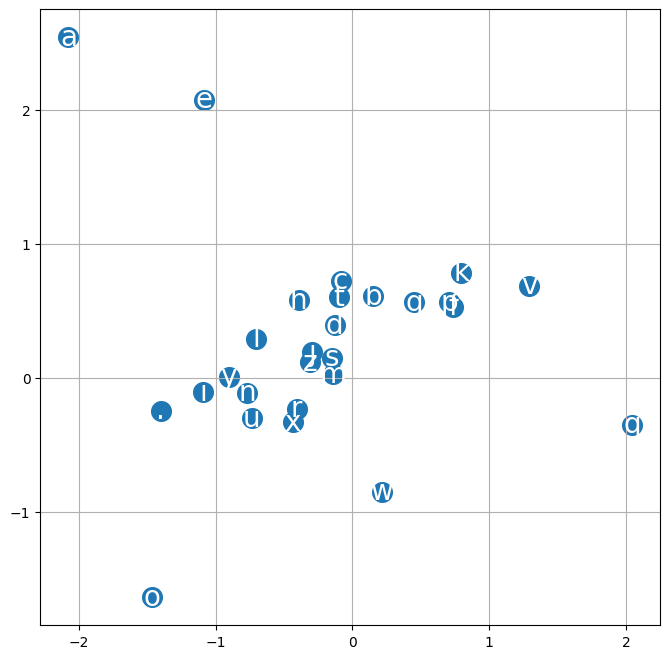

In [374]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], fontsize=20, ha="center", va="center", color="white")
plt.grid("minor")

In [375]:
# sample from the model
g = torch.Generator().manual_seed(214483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print("".join(itos[i] for i in out))

jah.
kamyrestlina.
mashivani.
hal.
kalee.
hawn.
dric.
anna.
kamorr.
gana.
makayaree.
devon.
amuad.
kaime.
pendle.
braxlen.
colba.
avrum.
shural.
raioni.


In [ ]:
logits.max(1) # Y_labelとほとんど一致する

In [ ]:
Y_label # ...のとき、Y_labelはe, o, a など同じ確率で出力されるため、max(1)で最大値はY_labelと完全に一致しない

In [ ]:
F.cross_entropy(logits, Y_label)